
**Actividad autónoma U3-T1 (AA5)**  
**Brayan Cradenas**  
**2 Semetre "A"** 


*Transformacion de datos*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

*Dataset Reading*

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv("heart.csv")

# Mostrar las primeras filas del dataset
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


*Verificar valores nulos*

In [6]:
# Revisamos si hay datos nulos
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

*Tipos de datos y estadísticas generales*

In [7]:
# Tipos de columnas y resumen estadístico
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


*Vizualizacion Eploratoria*

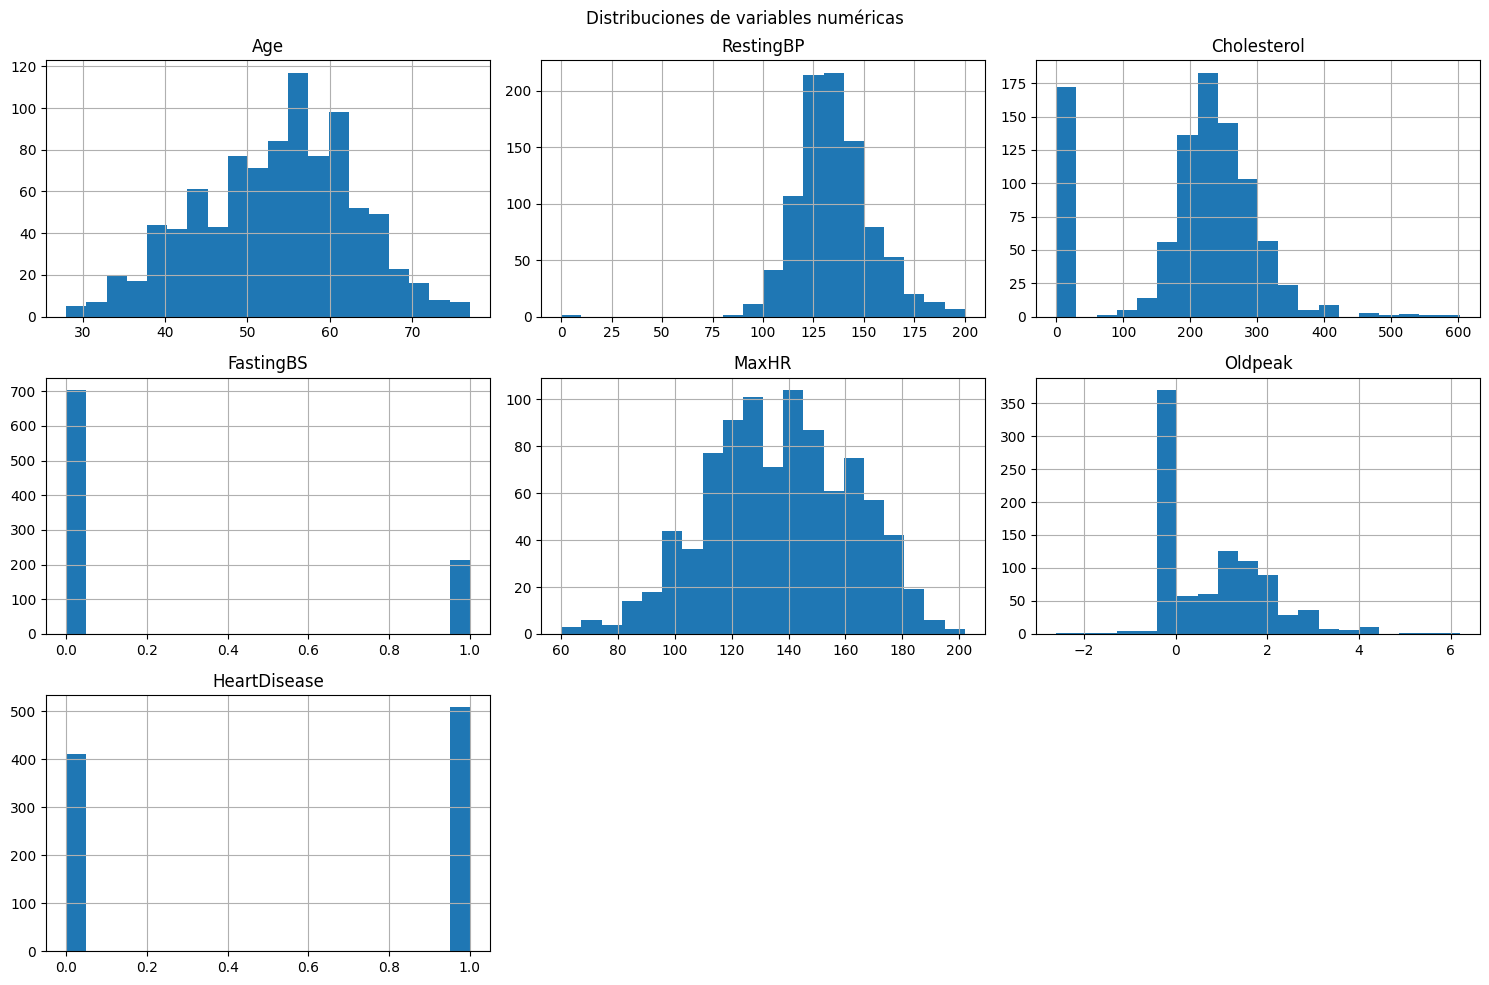

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de variables numéricas
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribuciones de variables numéricas")
plt.tight_layout()
plt.show()


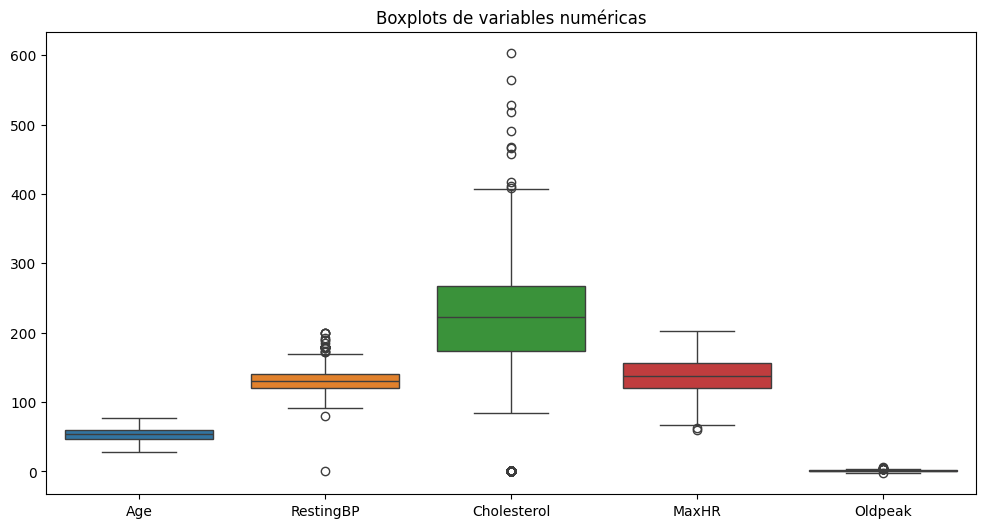

In [9]:
# Boxplots para detectar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
plt.title("Boxplots de variables numéricas")
plt.show()


*Codificación de variables categóricas*

In [10]:
# Convertimos variables categóricas usando pd.get_dummies
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


 *Normalización/Estandarización de variables numéricas (manualmente, sin sklearn)*

In [11]:
# Normalización (0 a 1)
df_encoded_norm = df_encoded.copy()

cols_to_normalize = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in cols_to_normalize:
    df_encoded_norm[col] = (df_encoded[col] - df_encoded[col].min()) / (df_encoded[col].max() - df_encoded[col].min())

df_encoded_norm.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,True,True,False,False,True,False,False,False,True
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,False,False,True,False,True,False,False,True,False
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,True,True,False,False,False,True,False,False,True
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,False,False,False,False,True,False,True,True,False
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,True,False,True,False,True,False,False,False,True


*Modelo de Clasificación (Logistic Regression)*

*Separamos los datos*

In [12]:
from sklearn.model_selection import train_test_split

X = df_encoded_norm.drop("HeartDisease", axis=1)
y = df_encoded_norm["HeartDisease"]

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*Entrenamos el modelo de clasificación*

In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)  # aumentamos iteraciones para asegurar convergencia
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

*Evaluacion de Modelo*

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicciones
y_pred = clf.predict(X_test)

# Exactitud
print("Accuracy:", accuracy_score(y_test, y_pred))

# Reporte completo
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8532608695652174

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


Confusion Matrix:
 [[67 10]
 [17 90]]


*Visualizacion la matriz de confusión*

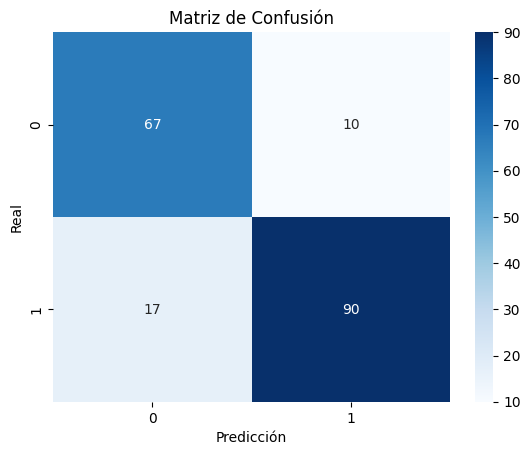

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


*Modelo de Regresión (Linear Regression)*

*Elegimos la variable objetivo (Cholesterol) y preparar los datos*

In [16]:
from sklearn.model_selection import train_test_split

# Variables independientes: todo menos 'Cholesterol'
X_reg = df_encoded_norm.drop("Cholesterol", axis=1)

# Variable dependiente: Cholesterol
y_reg = df_encoded_norm["Cholesterol"]

# División en entrenamiento y prueba (80% - 20%)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


*Entrenamos el modelo de regresión*

In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_r, y_train_r)


LinearRegression()

*Evaluamos el Modelo*

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicciones
y_pred_r = reg.predict(X_test_r)

# Métricas de evaluación
mse = mean_squared_error(y_test_r, y_pred_r)
mae = mean_absolute_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


MSE: 0.03151702298308884
MAE: 0.1384904326800603
R²: 0.11583224784090518


*Visualizamos los resultados*

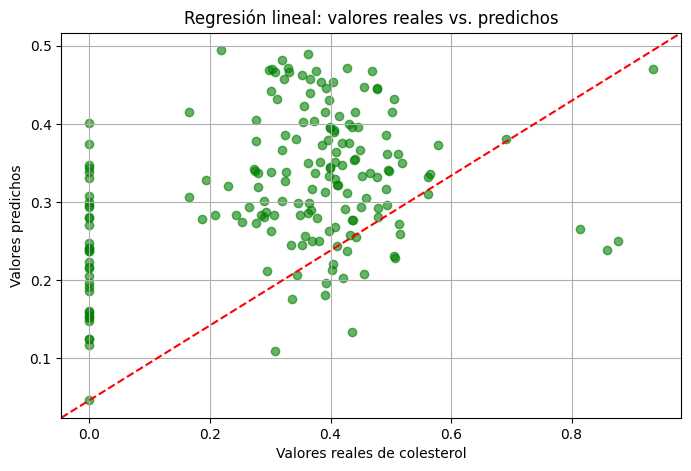

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, y_pred_r, alpha=0.6, color='green')
plt.xlabel("Valores reales de colesterol")
plt.ylabel("Valores predichos")
plt.title("Regresión lineal: valores reales vs. predichos")
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red', linestyle='--')
plt.grid()
plt.show()


### Conclusiones

- El modelo de **clasificación** con `LogisticRegression` permitió predecir correctamente los casos de enfermedad cardíaca con una precisión adecuada, según las métricas de exactitud y el análisis de la matriz de confusión.
- En el modelo de **regresión**, se utilizó `Cholesterol` como variable objetivo. Los resultados muestran una correlación moderada entre las variables y el colesterol, pero también indican que puede no ser tan predecible como otras variables médicas.
- La limpieza, codificación y normalización fueron etapas clave para preparar el dataset y garantizar buenos resultados.
- Una mejora posible sería aplicar **selección de características** o usar modelos más complejos como `RandomForest` o `XGBoost`.

